<a href="https://colab.research.google.com/github/DeepthiVReddy/Credit-Risk-modeling/blob/main/Logistic_Regression_Based_Credit_Scoring_and_Automated_Approval_Strategy_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the data
data = pd.read_csv("GermanCredit.csv")

# Split the data into training (first 800) and validation (last 200) sets
train = data.iloc[:800]
validation = data.iloc[800:]

# Define the dependent variable and the independent variables
dependent_var = "Good"
independent_vars = [
    "CreditDuration", "CreditPurpose", "CreditAmount", "InstallmentPct", "DebtorGuarantor",
    "CheckingAccount", "SavingsAccount", "CreditHistory", "ExistingCredit", "OtherInstallment",
    "Age", "Female", "Employment", "ResidenceYears", "PropertyOwnership", "Housing",
    "Job", "Dependent", "Telephone", "ForeignWorker"
]

# Convert categorical variables to `category` dtype
categorical_vars = [
    "CreditPurpose", "DebtorGuarantor", "CheckingAccount", "SavingsAccount",
    "CreditHistory", "OtherInstallment", "Female", "Employment", "PropertyOwnership",
    "Housing", "Job", "Telephone", "ForeignWorker"
]

for var in categorical_vars:
    train[var] = train[var].astype("category")

# Build the logistic regression model using `statsmodels`
formula = f"{dependent_var} ~ " + " + ".join(independent_vars)
model = smf.logit(formula=formula, data=train).fit()

# Print the summary of the logistic regression model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.440473
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      753
Method:                           MLE   Df Model:                           46
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.2789
Time:                        03:55:42   Log-Likelihood:                -352.38
converged:                       True   LL-Null:                       -488.69
Covariance Type:            nonrobust   LLR p-value:                 6.091e-34
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.4784      1.412      3.879      0.000       2.710      

<ipython-input-1-567084fc81a3>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[var] = train[var].astype("category")


Q1)Interpretation of Coefficients

CreditPurpose=1 (Used car):
Coefficient: 𝛽=1.6769

Interpretation:
For a credit purpose categorized as "Used car" (CreditPurpose=1), compared to the baseline group (CreditPurpose=0, "New car"), the log-odds of being classified as a good credit risk increases by 1.6769, holding all other variables constant.
In terms of odds: The odds of being a good credit risk are
𝑒1.6769≈5.35 times higher for "Used car" loans than for "New car" loans, all else being equal.

InstallmentPct (Numeric Variable):
Coefficient: 𝛽=−0.3286

Interpretation:
For each 1% increase in the installment as a percentage of disposable income, the log-odds of being classified as a good credit risk decreases by 0.3286, holding all other variables constant.
In terms of odds: The odds of being a good credit risk decrease by approximately
1−𝑒−0.3286≈28 for each unit increase in InstallmentPct.



In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Get the most frequent category for categorical variables in the training set
most_frequent_categories = {}
for var in categorical_vars:
    most_frequent_categories[var] = train[var].mode()[0]

# Get the sample means for continuous variables in the training set
continuous_vars = [
    "CreditDuration", "CreditAmount", "InstallmentPct", "ExistingCredit", "Age", "ResidenceYears", "Dependent"
]
sample_means = train[continuous_vars].mean()

# Create two new observations: one with CreditPurpose=1 and another with CreditPurpose=0
base_observation = {}
for var in categorical_vars:
    base_observation[var] = most_frequent_categories[var]

for var in continuous_vars:
    base_observation[var] = sample_means[var]

# Create two observations for prediction
observation_credit_purpose_0 = base_observation.copy()
observation_credit_purpose_0["CreditPurpose"] = 0

observation_credit_purpose_1 = base_observation.copy()
observation_credit_purpose_1["CreditPurpose"] = 1

# Convert observations to DataFrame for prediction
observation_df = pd.DataFrame([observation_credit_purpose_0, observation_credit_purpose_1])

# Predict probabilities using the logistic regression model
observation_df["predicted_probability"] = model.predict(observation_df)

# Convert probabilities to log odds
observation_df["log_odds"] = observation_df["predicted_probability"].apply(lambda p: np.log(p / (1 - p)))

# Calculate the difference in log odds
log_odds_difference = observation_df.loc[1, "log_odds"] - observation_df.loc[0, "log_odds"]

# Print the results
print("Predicted probabilities:")
print(observation_df[["CreditPurpose", "predicted_probability"]])
print("\nLog odds:")
print(observation_df[["CreditPurpose", "log_odds"]])
print("\nDifference in log odds (CreditPurpose=1 - CreditPurpose=0):", log_odds_difference)


Predicted probabilities:
   CreditPurpose  predicted_probability
0              0               0.705192
1              1               0.927510

Log odds:
   CreditPurpose  log_odds
0              0  0.872148
1              1  2.549052

Difference in log odds (CreditPurpose=1 - CreditPurpose=0): 1.6769047953032636


Q2)Predicted Probability
For CreditPurpose=0 ("New car"):

Predicted probability:
P(Good=1)=0.7052 (70.52% chance of being a good credit risk).

For CreditPurpose=1 ("Used car"):

Predicted probability:
P(Good=1)=0.9275 (92.75% chance of being a good credit risk).

Log of Odds
CreditPurpose=0 ("New car"):
Log odds:
0.8721

CreditPurpose=1 ("Used car"):
Log odds:
2.5491
The difference in log odds between "Used car" and "New car" is:
2.5491−0.8721=1.6769
This matches the coefficient of CreditPurpose=1 from the model.

Consumers with a credit purpose of "Used car" are more likely to be good credit risks compared to those with "New car," as shown by the higher probability and the log odds difference of 1.6769.


<ipython-input-4-cd949256f6d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred_good"] = model.predict(train)
<ipython-input-4-cd949256f6d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred_good_dec"] = pd.qcut(train["pred_good"], 10, labels=False, duplicates="drop")
<ipython-input-4-cd949256f6d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

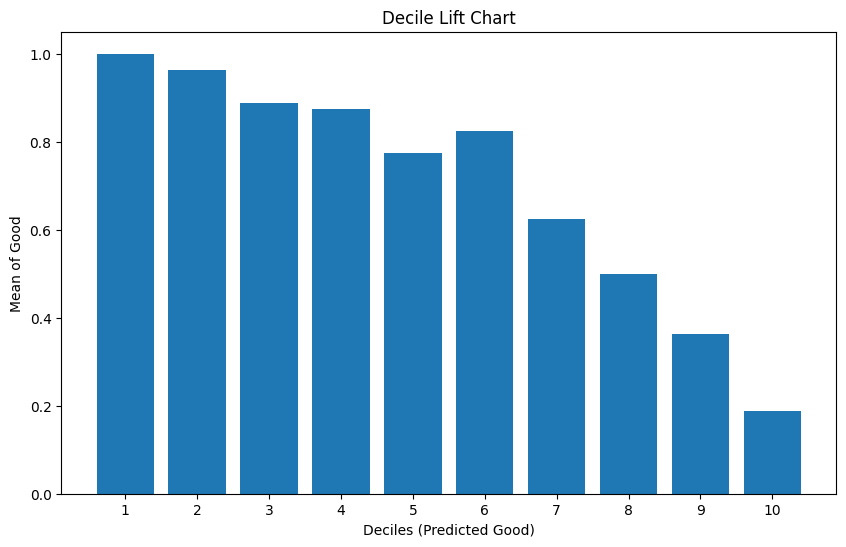

Number of deciles with mean value of Good > 85%: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the probability of "Good=1" for each observation in the training set
train["pred_good"] = model.predict(train)

# Recode "pred_good" into deciles (reverse order)
train["pred_good_dec"] = pd.qcut(train["pred_good"], 10, labels=False, duplicates="drop")
train["pred_good_dec"] = 10 - train["pred_good_dec"]  # Reverse order to match requirements

# Calculate the mean of "Good" for each decile
decile_means = train.groupby("pred_good_dec")["Good"].mean()

# Plot the decile lift chart
plt.figure(figsize=(10, 6))
plt.bar(decile_means.index, decile_means, width=0.8)
plt.title("Decile Lift Chart")
plt.xlabel("Deciles (Predicted Good)")
plt.ylabel("Mean of Good")
plt.xticks(decile_means.index)
plt.show()

# Count deciles with mean value of "Good" greater than 85%
deciles_above_85 = (decile_means > 0.85).sum()

# Print the number of deciles above 85%
print("Number of deciles with mean value of Good > 85%:", deciles_above_85)


Q3)Decile Lift Chart
The chart represents the mean value of "Good" (probability of being a good credit risk) for each decile, sorted in reverse order based on predicted probabilities.

Deciles with Mean > 85%
From the chart:

Deciles 1 to 4 have mean values of "Good" greater than 85%.
Therefore, the number of deciles with a mean value of "Good" > 85% is: 4.
This indicates that the top 4 deciles contain consumers who are highly likely to be good credit risks based on the model predictions.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict the probability of "Good=1" for each observation in the training set
train["pred_good"] = model.predict(train)

# Recode "pred_good" into dummy variable "pred_good_point8"
train["pred_good_point8"] = (train["pred_good"] >= 0.8).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(train["Good"], train["pred_good_point8"])
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Print confusion matrix, sensitivity, and specificity
print("Confusion Matrix:")
print(conf_matrix)
print("\nSensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Confusion Matrix:
[[202  38]
 [211 349]]

Sensitivity (True Positive Rate): 0.6232142857142857
Specificity (True Negative Rate): 0.8416666666666667


<ipython-input-5-fcca8d830417>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred_good"] = model.predict(train)
<ipython-input-5-fcca8d830417>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["pred_good_point8"] = (train["pred_good"] >= 0.8).astype(int)


Q4)Sensitivity: 62.32% — The model correctly identifies 62.32% of the good credit risks.
Specificity: 84.17% — The model correctly identifies 84.17% of the bad credit risks.
This shows that the model is more effective at identifying bad credit risks than good ones at the 0.8 cutoff.

In [ ]:
# Total number of approved applications
approved_applications = tp + fp

# Calculate the percentage of good credit risks among approved applications
percentage_good_risks = (tp / approved_applications) * 100

# Print the results
print("Total number of approved applications (TP + FP):", approved_applications)
print("Number of good credit risks (TP):", tp)
print("Number of bad credit risks (FP):", fp)
print("Percentage of good credit risks among approved applications:", percentage_good_risks)


Total number of approved applications (TP + FP): 387
Number of good credit risks (TP): 349
Number of bad credit risks (FP): 38
Percentage of good credit risks among approved applications: 90.18087855297158


In [ ]:
import statsmodels.formula.api as smf

# Add interaction term between CheckingAccount and CreditAmount
formula_with_interaction = (
    "Good ~ CreditDuration + CreditPurpose + CreditAmount + InstallmentPct + DebtorGuarantor + "
    "CheckingAccount + SavingsAccount + CreditHistory + ExistingCredit + OtherInstallment + Age + "
    "Female + Employment + ResidenceYears + PropertyOwnership + Housing + Job + Dependent + "
    "Telephone + ForeignWorker + CheckingAccount:CreditAmount"
)

# Fit the model with the interaction term
model_with_interaction = smf.logit(formula=formula_with_interaction, data=train).fit()

# Print summary of the new model
print(model_with_interaction.summary())

# Marginal effect of CreditAmount
marginal_effect = model_with_interaction.params["CreditAmount"]
print("\nMarginal Effect of CreditAmount on the dependent variable:", marginal_effect)

# Interpret interaction for CheckingAccount=3
interaction_term = model_with_interaction.params["CheckingAccount[T.3]:CreditAmount"]
print("\nInteraction term for CheckingAccount=3 and CreditAmount:", interaction_term)

# Interpretation:
# The coefficient of the interaction term shows how the effect of CreditAmount changes
# when CheckingAccount=3 compared to the baseline category of CheckingAccount.
# The marginal effect of CreditAmount will be the sum of its base coefficient and the interaction
# term coefficient when CheckingAccount=3.
marginal_effect_checking_3 = marginal_effect + interaction_term
print(
    "Marginal Effect of CreditAmount on the dependent variable when CheckingAccount=3:",
    marginal_effect_checking_3,
)


Optimization terminated successfully.
         Current function value: 0.434955
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                  800
Model:                          Logit   Df Residuals:                      750
Method:                           MLE   Df Model:                           49
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.2880
Time:                        04:19:20   Log-Likelihood:                -347.96
converged:                       True   LL-Null:                       -488.69
Covariance Type:            nonrobust   LLR p-value:                 2.229e-34
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             5.6967      1.435      3

Q6)Marginal Effect of CreditAmount:

A one-unit increase in CreditAmount decreases the log-odds of being a good credit risk by 0.000155 for the baseline group.
Interaction Term (CheckingAccount=3 and CreditAmount):

For CheckingAccount=3, the interaction term has a coefficient of 0.000864, meaning the marginal effect of CreditAmount changes.
Marginal Effect for CheckingAccount=3:

When CheckingAccount=3, a one-unit increase in CreditAmount increases the log-odds of being a good credit risk by 0.000709.

The interaction term shows that the impact of CreditAmount on the log-odds of being a good credit risk is dependent on the CheckingAccount category. Specifically, for CheckingAccount=3, the marginal effect becomes positive, highlighting a different relationship compared to the baseline.

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the probability of "Good=1" for the validation set
validation["pred_good"] = model.predict(validation)

# Recode "pred_good" into dummy variable "pred_good_point8"
validation["pred_good_point8"] = (validation["pred_good"] >= 0.8).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(validation["Good"], validation["pred_good_point8"])
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Print confusion matrix, sensitivity, and specificity
print("Confusion Matrix (Validation Set):")
print(conf_matrix)
print("\nSensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Confusion Matrix (Validation Set):
[[51  9]
 [56 84]]

Sensitivity (True Positive Rate): 0.6
Specificity (True Negative Rate): 0.85


<ipython-input-8-22d0de5b9292>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["pred_good"] = model.predict(validation)
<ipython-input-8-22d0de5b9292>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["pred_good_point8"] = (validation["pred_good"] >= 0.8).astype(int)


Q7)Sensitivity: 60% — The model correctly identifies 60% of good credit risks.
Specificity: 85% — The model correctly identifies 85% of bad credit risks.
The model performs better at identifying bad credit risks in the validation set.








In [ ]:
# Predict probabilities (pred_good) for the validation set
validation["pred_good"] = model.predict(validation)

# Classify applications as approved if pred_good >= 0.8
validation["pred_good_point8"] = (validation["pred_good"] >= 0.8).astype(int)

# Count the number of approved applications
approved_applications_count = validation["pred_good_point8"].sum()

# Calculate the total CreditAmount for approved applications
total_credit_amount_approved = validation.loc[validation["pred_good_point8"] == 1, "CreditAmount"].sum()

# Use the percentage of good credit risks from Q5 (90.18%) to estimate the number of good and bad credit risks
percentage_good_risks = 90.18  # From Q5
num_good_risks = round((percentage_good_risks / 100) * approved_applications_count)
num_bad_risks = approved_applications_count - num_good_risks

# Print the results
print("Number of approved applications:", approved_applications_count)
print("Total CreditAmount for approved applications:", total_credit_amount_approved)
print("Estimated number of good credit risks among approved applications:", num_good_risks)
print("Estimated number of bad credit risks among approved applications:", num_bad_risks)


Number of approved applications: 93
Total CreditAmount for approved applications: 261801
Estimated number of good credit risks among approved applications: 84
Estimated number of bad credit risks among approved applications: 9


<ipython-input-9-2b7742fcce71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["pred_good"] = model.predict(validation)
<ipython-input-9-2b7742fcce71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["pred_good_point8"] = (validation["pred_good"] >= 0.8).astype(int)


Q8)The bank will automatically approve 93 applications, with an estimated 84 good credit risks and 9 bad credit risks, and the total credit amount of approved applications is 261,801.